# ПРОЕКТ:


0) Изучаете контекст датасета и придумываете бизнес-цель

1)Делаете постановку задач на исследование (минимум 2 задачи, 1 под классфификацию/регрессию, 1 под кластеризацию (в крайнем случае делаем допущение что у нас нет Y) , )

2)Оценка Датасета (pandas/np/statsmodel...)

3)Подготовка данных

4)Выполнение исследований ( в том числе с промежуточными итогами, визуализациями)

5)Итоговые визуализации и выводы

6)Предложения по развитию вашей работы


# 1. Кластеризация

В этом проекте мы будем работать с выложенными в общий доступ данными о содержании различных веществ в "Vinho Verde" (красном вине)

Наша цель: использовать имеющиеся данные для построения модели, которая поможет разделить напитки на кластеры по рейтингу.

Для чего: Для распределения вин по ценам, престижности и классам, а так же выявить какие значения химических и  физических показателей характерны для более вкусных и качественных вин.


In [51]:
import pandas as pd
import numpy as np

# Загружаем наш датасет с исходными данными
data = pd.read_csv("C:\\Users\\Rabat\\Desktop\\WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [53]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Рассмотрим наш дадасет, всего имеется 1143 подвидов данного сорта вина.

Представлены 13 показателей:

1 - фиксированная кислотность\fixed acidity 

2 - летучая кислотность\volatile acidity

3 - лимонная кислота\citric acid  

4 - остаточный сахар\residual sugar

5 - хлориды\chlorides  

6 - свободный диоксид серы\free sulfur dioxide 

7 - общий диоксид серы\total sulfur dioxide 

8 - плотность\density 

9 - pH\pH

10 - сульфаты\sulphates

11 - алкоголь\alcohol 

12 - Оценка сомелье

13 - Id 


In [54]:
def missing_values_table(df):
        # Общее количество пропущенных значений
        mis_val = df.isnull().sum()
        
        # Процент пропущенных значений
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Таблица с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименовываем колонки
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Сортировка таблицы по проценту пропущенных элементов по убыванию
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Общая информация
        print ("В вашем датафрейме " + str(df.shape[1]) + " колонок.\n"      
            "Из них " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок, содержит пропущенные значения.")
        
        # Возвращаем датафрейм с колонками, имеющими пропущенные значения
        return mis_val_table_ren_columns

In [55]:
missing_values_table(data)

В вашем датафрейме 13 колонок.
Из них 0 колонок, содержит пропущенные значения.


,Missing Values,% of Total Values


Пропущенные значения отстуствуют

In [56]:
a = len(data[data.duplicated()])
if a == 0:
    print('Дубликатов нет')
else:
    print('Дубликаты есть, их количество: ', a)

Дубликатов нет


In [57]:
data = data.drop_duplicates()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [58]:
a = len(data[data.duplicated()])
if a == 0:
    print('Дубликатов нет')
else:
    print('Дубликаты есть, их количество: ', a)

Дубликатов нет


In [59]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
from IPython.core.pylabtools import figsize
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
sns.set(font_scale = 2)

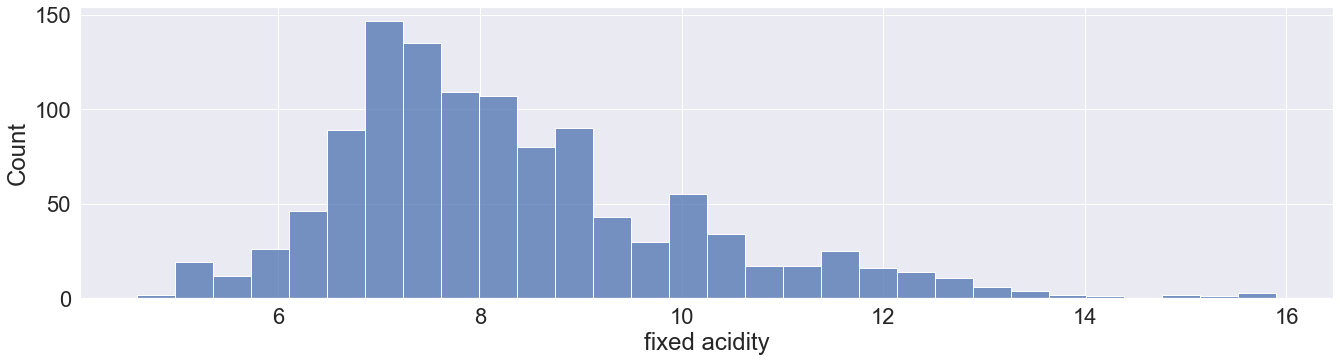

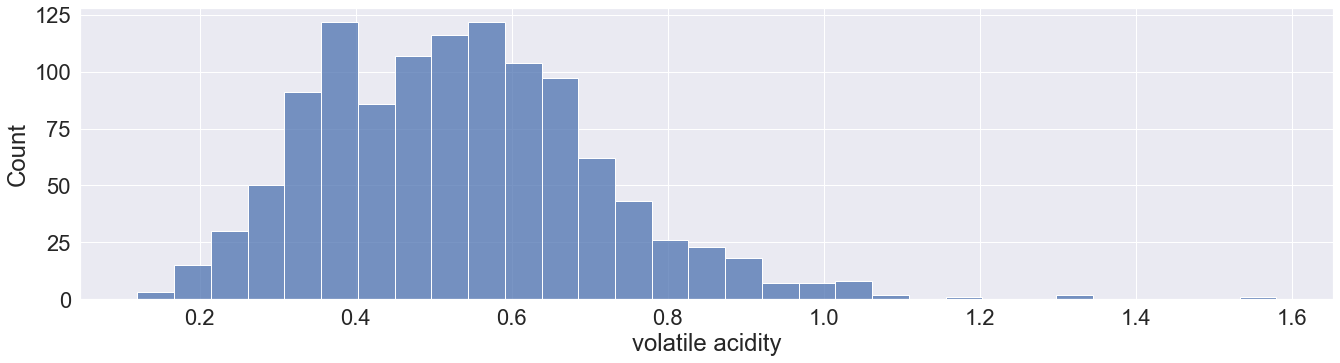

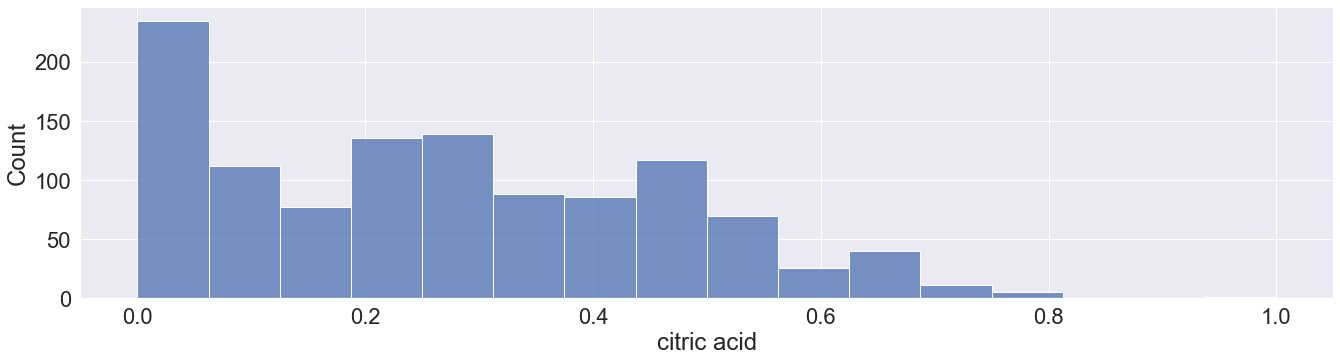

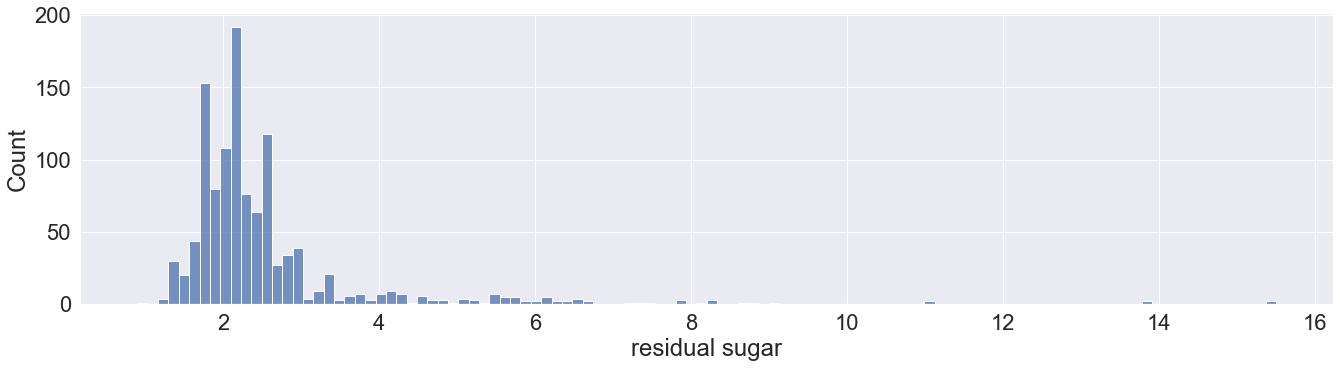

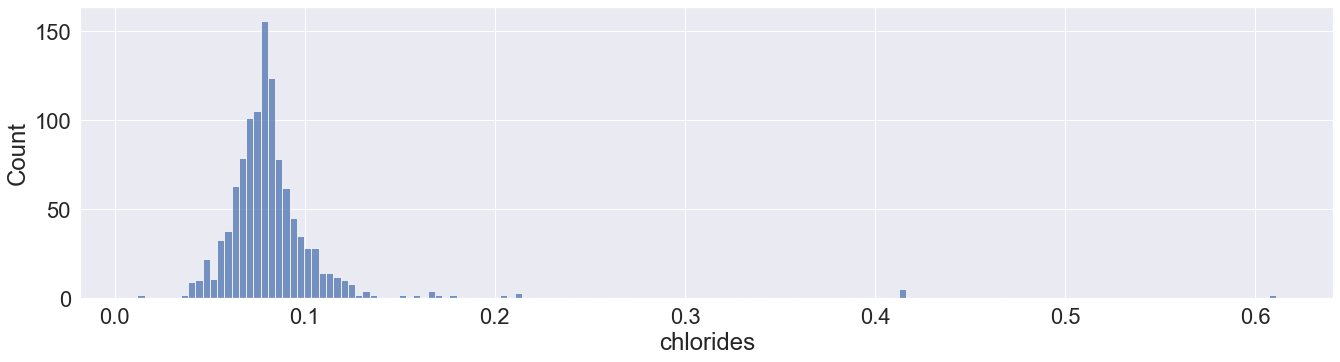

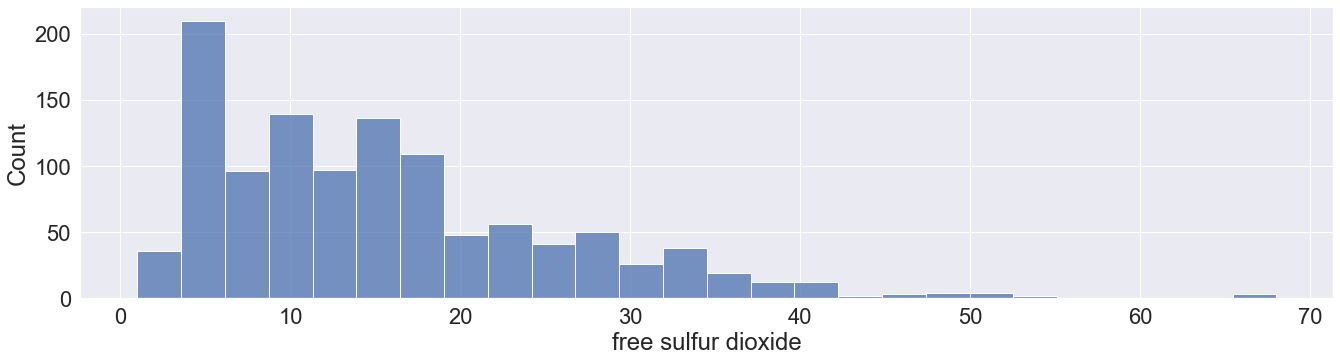

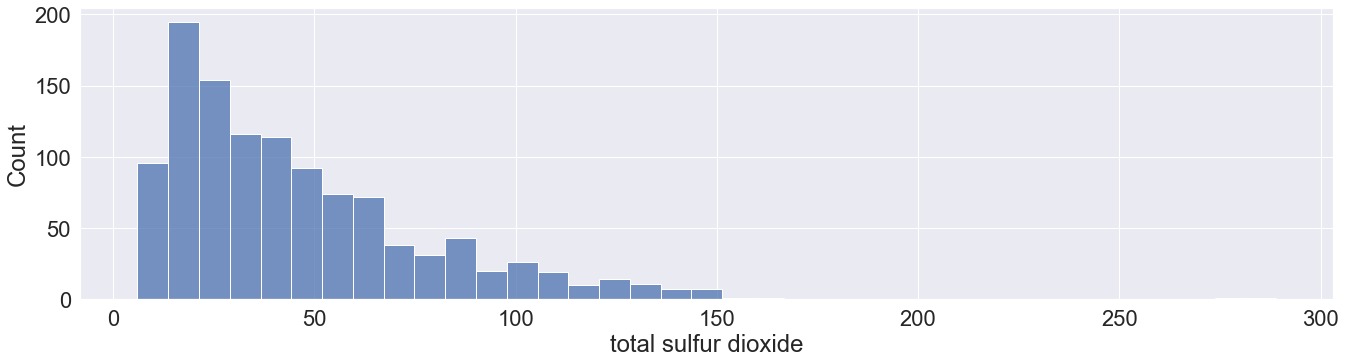

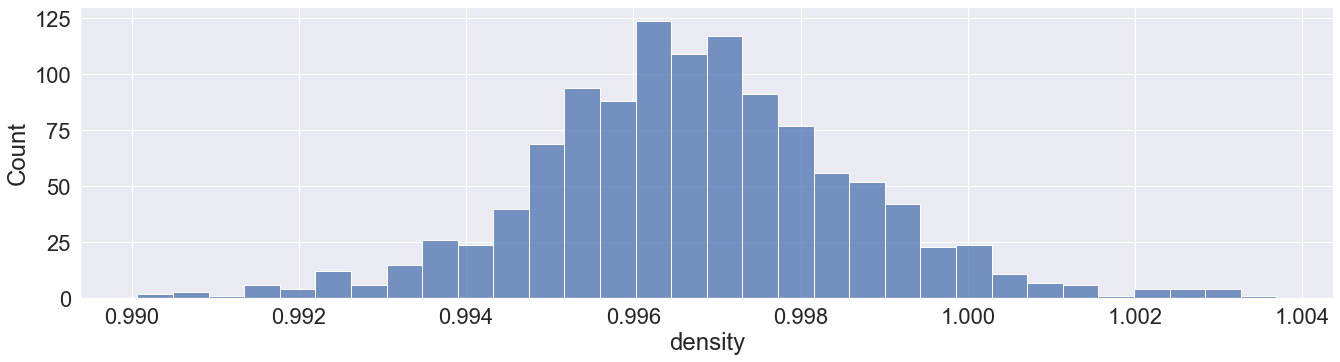

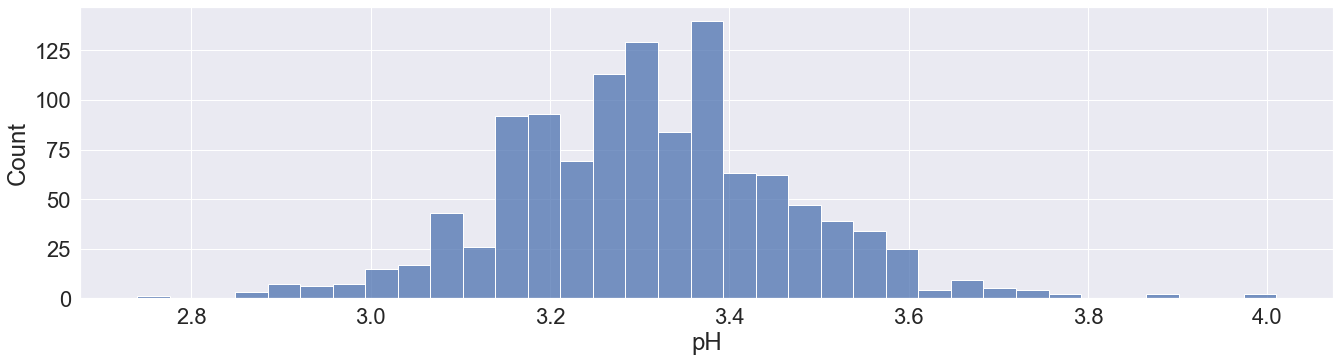

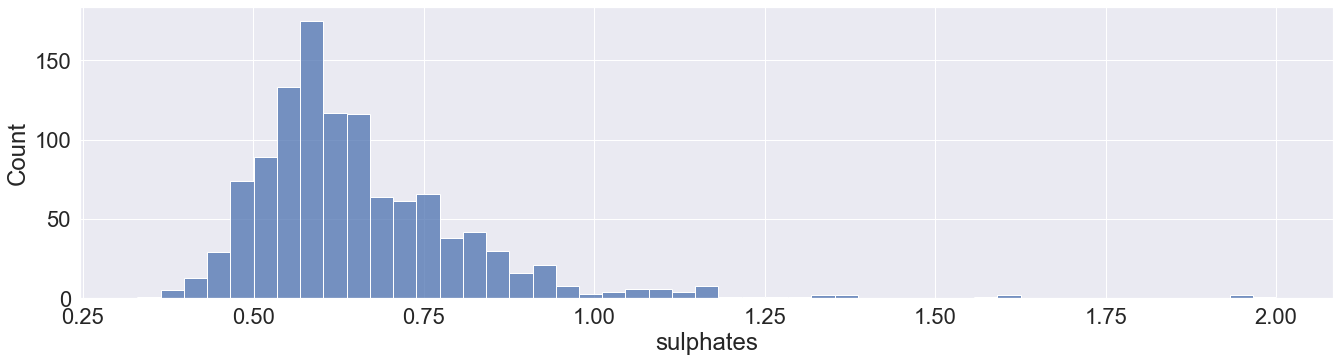

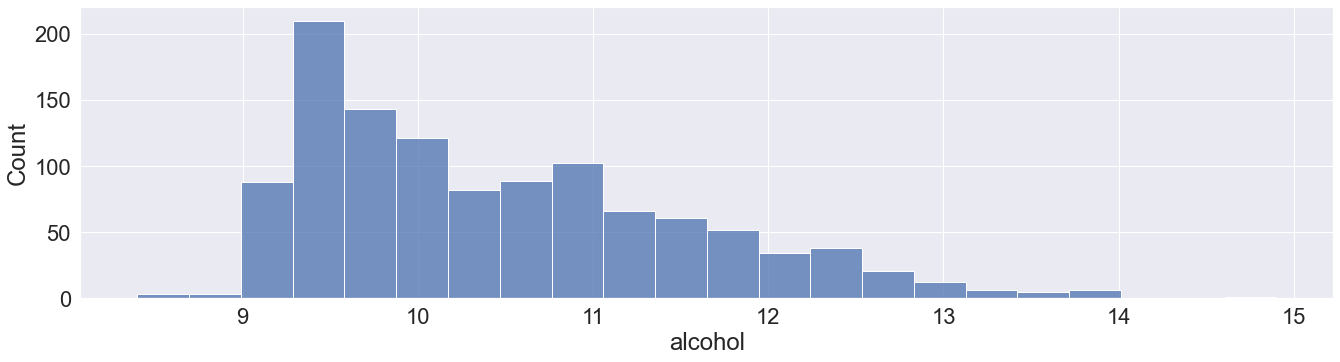

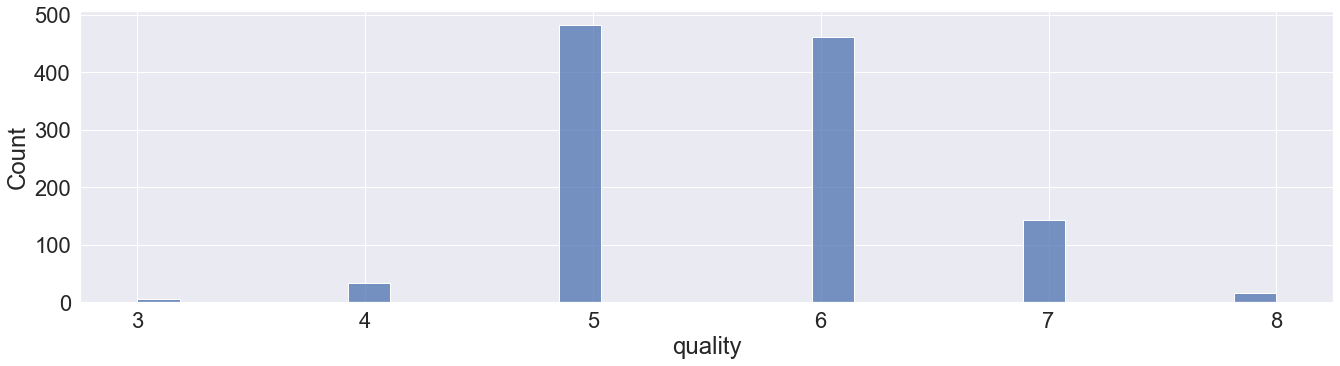

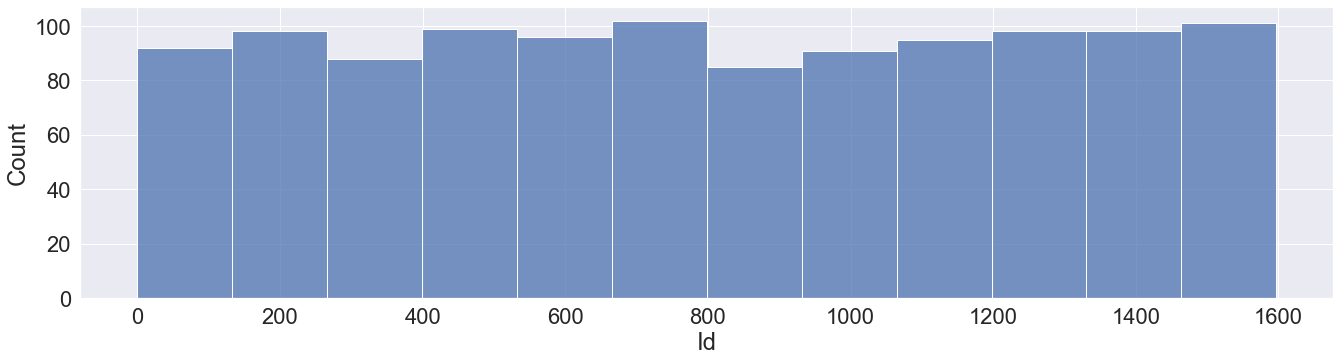

In [62]:
for column in data.columns:
        plt.figure(figsize = (20,5))
        sns.histplot(data[column])
        plt.show()

На графиках видно, что большинство характеристик имеют распределение близкое к нормальному.
На некоторых графиках присутсвуют значения далёкие от основного количества, подозреваем что это выбросы, но т.к. это вино, и его вкус напрямую зависит например от сахара, то убирать данные значения из выюорки не буду.

Перейдем к исследованию взаимосвязей между признаками и рассмотрим коэффициент корреляции Пирсона.

<AxesSubplot:>

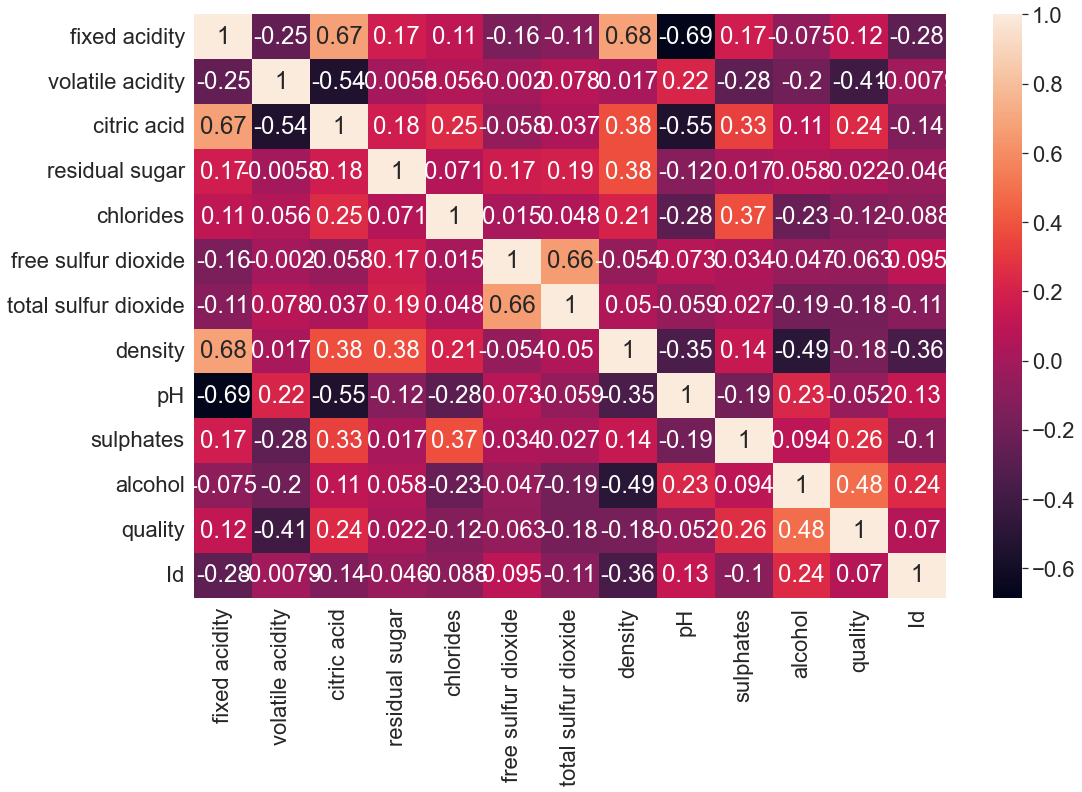

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson', min_periods=1),annot=True)

Признаки, которые сильно коррелируют друг с другом, называются коллинеарными. Удаление одной переменной в таких парах признаков часто помогает модели обобщать и быть более интерпретируемой.

Видим много пар параметров у которых коэф кореляции выше 0.5 или около этого, посмотрим что это за пары:

citric acid - fixed acidity

density - fixed acidity

pH - fixed acidity

citric acid - volatile acidity

citric acid - pH

это нормально, т.к. в химическом анализе некоторые параметры напрямую зависят друг от друга

Избавимся от одного параметра из каждой пары


In [162]:
dataset_reduced = data.drop(['fixed acidity','citric acid','density','volatile acidity', 'free sulfur dioxide', 'chlorides'], axis =1)
dataset_reduced


,residual sugar,total sulfur dioxide,pH,sulphates,alcohol,quality,Id
0,1.9,34.0,3.51,0.56,9.4,5,0
1,2.6,67.0,3.20,0.68,9.8,5,1
2,2.3,54.0,3.26,0.65,9.8,5,2
3,1.9,60.0,3.16,0.58,9.8,6,3
4,1.9,34.0,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...
1138,2.3,40.0,3.42,0.75,11.0,6,1592
1139,1.9,38.0,3.42,0.82,9.5,6,1593
1140,2.0,44.0,3.45,0.58,10.5,5,1594
1141,2.2,51.0,3.52,0.76,11.2,6,1595


<AxesSubplot:>

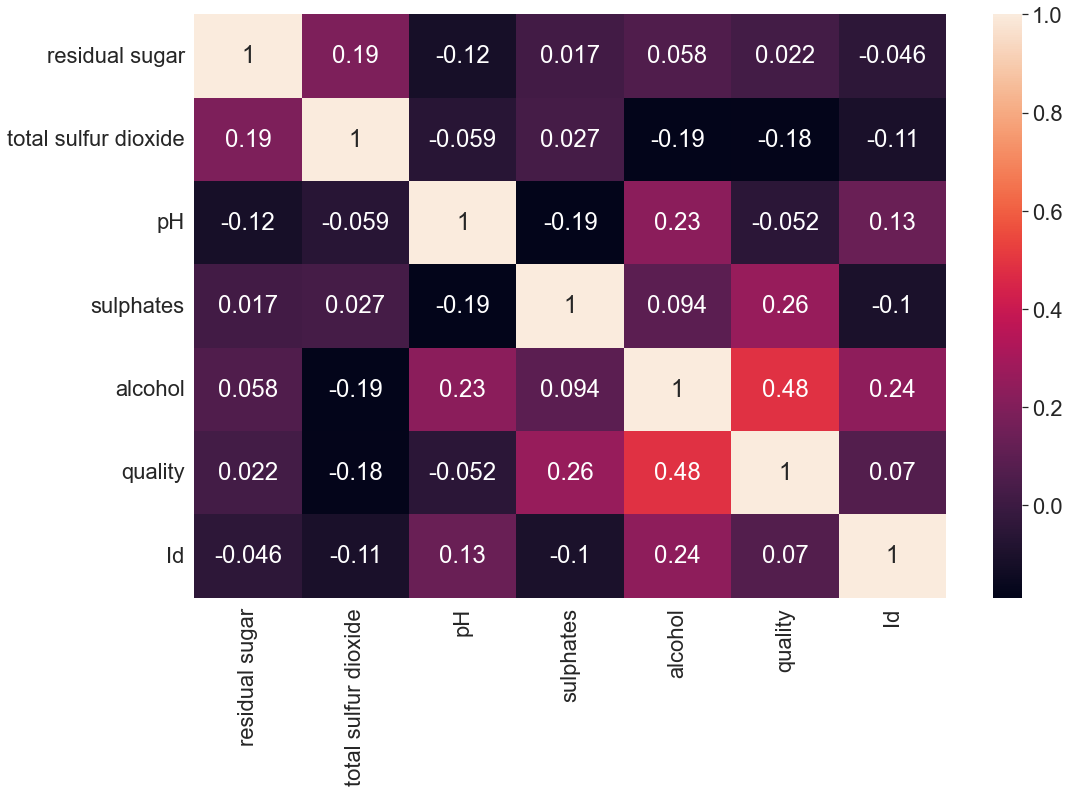

In [163]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset_reduced.corr(method='pearson', min_periods=1),annot=True)

Так уже стало значительно лучше

Приведём переменные к виду от 0 до 1

In [164]:
dataset = dataset_reduced

In [165]:
from sklearn.preprocessing import MinMaxScaler

columns = dataset.columns
scaler = MinMaxScaler()
rescaled_dataset_minmax = scaler.fit_transform(dataset) 
df = pd.DataFrame(data=rescaled_dataset_minmax , columns = columns)
df

,residual sugar,total sulfur dioxide,pH,sulphates,alcohol,quality,Id
0,0.068493,0.098940,0.606299,0.137725,0.153846,0.4,0.000000
1,0.116438,0.215548,0.362205,0.209581,0.215385,0.4,0.000626
2,0.095890,0.169611,0.409449,0.191617,0.215385,0.4,0.001252
3,0.068493,0.190813,0.330709,0.149701,0.215385,0.6,0.001879
4,0.068493,0.098940,0.606299,0.137725,0.153846,0.4,0.002505
...,...,...,...,...,...,...,...
1138,0.095890,0.120141,0.535433,0.251497,0.400000,0.6,0.996869
1139,0.068493,0.113074,0.535433,0.293413,0.169231,0.6,0.997495
1140,0.075342,0.134276,0.559055,0.149701,0.323077,0.4,0.998121
1141,0.089041,0.159011,0.614173,0.257485,0.430769,0.6,0.998748


Переходим к кластеризации
Выбранный метод - k-means.

Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

Первоначально выбирается желаемое количество кластеров - n.

Далее случайным образом из входных данных выбираются n элементов выборки, в соответствие которым ставятся три кластера, в каждый из которых теперь включено по одной точке, каждая при этом является центроидом этого кластера.

После чего ищем ближайшего соседа текущего центроида. Добавляем точку к соответствующему кластеру и пересчитываем положение центроида с учетом координат новых точек. Алгоритм заканчивает работу, когда координаты каждого центроида перестают меняться. Центроид каждого кластера в результате представляет собой набор значений признаков, описывающих усредненные параметры выделенных классов.

Начнем с определения оптимального числа кластеров, и для этого используем метод "локтя".

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


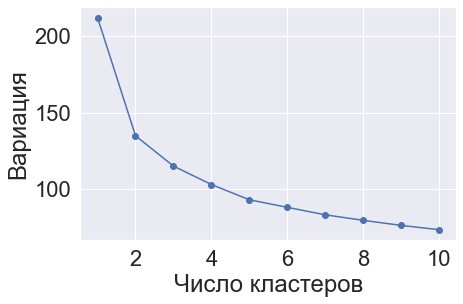

In [166]:
from sklearn.cluster import KMeans

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Вариация')
plt.show()

В нашем случае нам предстоит выбрать между 3 и 4 класстерами, т.к. тут происходим переломный момент на графике, остановлюсь на 3 класстерах, будем делить вина на хорошие, приемлемые и дешёвые

In [167]:
km = KMeans (
    n_clusters = 3, # количество кластеров/центроидов для создания
    init = 'random', # ‘random’: выбор 3| наблюдений (строк) случайным образом из данных для начальных центроидов
    n_init = 10, # по умолчанию. Это количество раз, когда алгоритм k-средних будет выполняться с разными начальными значениями центроида
    max_iter = 300, # по умолчанию. Это максимальное количество итераций алгоритма k-средних для одного запуска.
    tol = 1e-4, # по умолчанию. Это относительный допуск по отношению к норме Фробениуса разницы в центрах кластеров двух последовательных итераций для объявления сходимости.
    random_state = 0 # по умолчанию. Определяет генерацию случайных чисел для инициализации центроида.
)

In [168]:
predicted_df = km.fit_predict(df) 
predicted_df

array([1, 1, 1, ..., 0, 0, 0])

In [169]:
km.cluster_centers_

array([[0.10414878, 0.13770809, 0.47138965, 0.17766647, 0.28986236,
        0.48119891, 0.81312713],
       [0.11368417, 0.160618  , 0.42713135, 0.19929431, 0.2248339 ,
        0.4806142 , 0.25236738],
       [0.11892291, 0.10584078, 0.46422727, 0.21669602, 0.53168426,
        0.70745098, 0.57344776]])

In [170]:
df['cluster'] = predicted_df
df

,residual sugar,total sulfur dioxide,pH,sulphates,alcohol,quality,Id,cluster
0,0.068493,0.098940,0.606299,0.137725,0.153846,0.4,0.000000,1
1,0.116438,0.215548,0.362205,0.209581,0.215385,0.4,0.000626,1
2,0.095890,0.169611,0.409449,0.191617,0.215385,0.4,0.001252,1
3,0.068493,0.190813,0.330709,0.149701,0.215385,0.6,0.001879,1
4,0.068493,0.098940,0.606299,0.137725,0.153846,0.4,0.002505,1
...,...,...,...,...,...,...,...,...
1138,0.095890,0.120141,0.535433,0.251497,0.400000,0.6,0.996869,0
1139,0.068493,0.113074,0.535433,0.293413,0.169231,0.6,0.997495,0
1140,0.075342,0.134276,0.559055,0.149701,0.323077,0.4,0.998121,0
1141,0.089041,0.159011,0.614173,0.257485,0.430769,0.6,0.998748,0


In [171]:
df_table = pd.pivot_table(df, index=['cluster'])
df_table

,Id,alcohol,pH,quality,residual sugar,sulphates,total sulfur dioxide
cluster,,,,,,,
0,0.813127,0.289862,0.471390,0.481199,0.104149,0.177666,0.137708
1,0.252367,0.224834,0.427131,0.480614,0.113684,0.199294,0.160618
2,0.573448,0.531684,0.464227,0.707451,0.118923,0.216696,0.105841


Посмотрим на графиках парных зависимостей между признаками, как распределены данные в соответствующие кластеры:

In [172]:
df3 = df.drop(['Id'], axis =1)

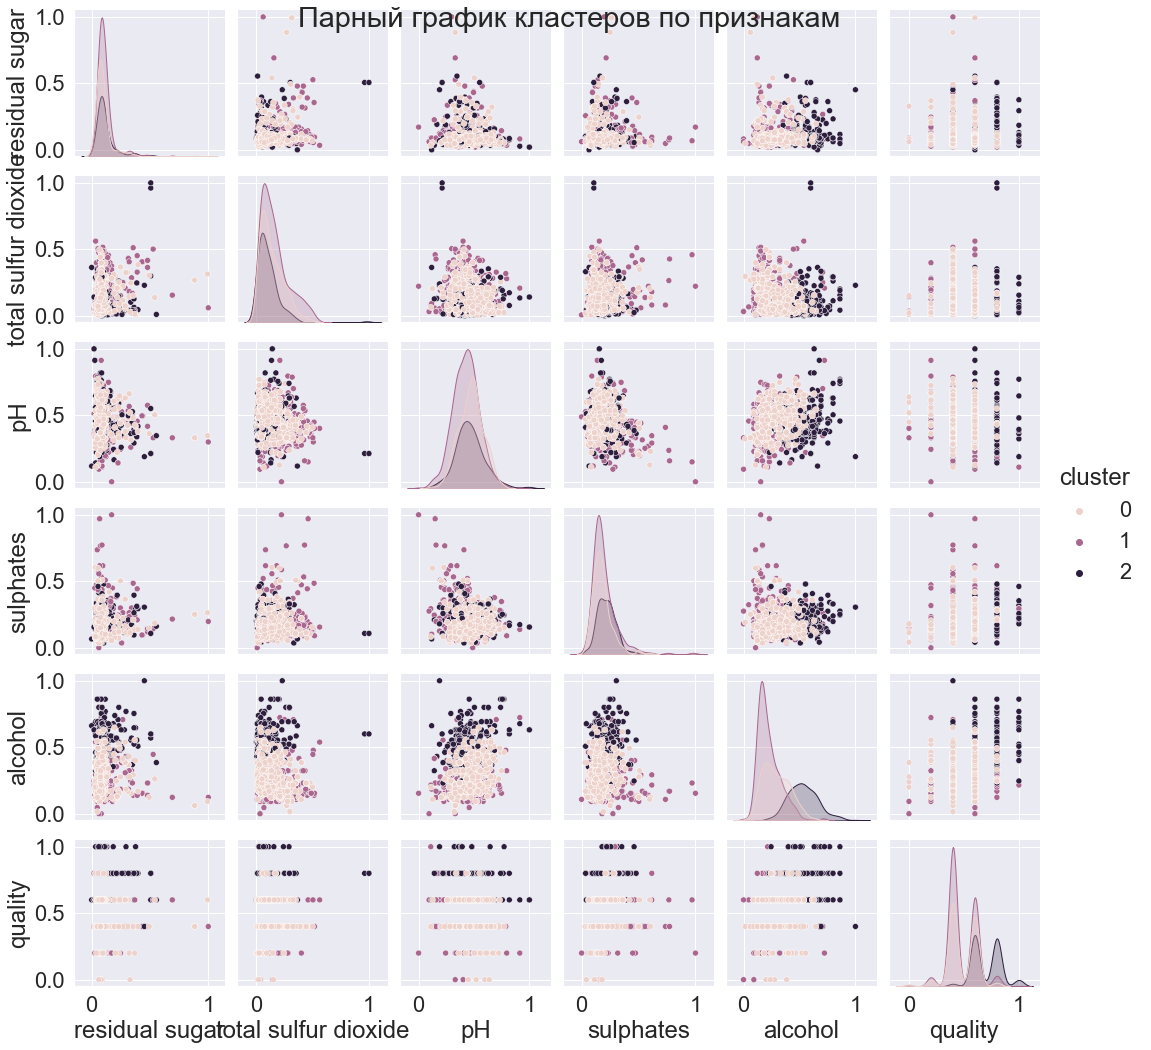

In [173]:
sns.pairplot(df3, hue="cluster")

plt.suptitle('Парный график кластеров по признакам');


In [157]:
df2 = df
df2.loc[(test_df2['cluster'] == 0), 'c1'] = 1
df2.loc[(test_df2['cluster'] == 1), 'c2'] = 1
df2.loc[(test_df2['cluster'] == 2), 'c3'] = 1

df2.loc[(test_df2['cluster'] != 0), 'c1'] = 0
df2.loc[(test_df2['cluster'] != 1), 'c2'] = 0
df2.loc[(test_df2['cluster'] != 2), 'c3'] = 0

count1 = df2['c1'].sum()
count2 = df2['c2'].sum()
count3 = df2['c3'].sum()

print('Количество данных, попавших в первый кластер ', count1)
print('Количество данных, попавших в второй кластер ', count2)
print('Количество данных, попавших в третий кластер ', count3)

Количество данных, попавших в первый кластер  261.0
Количество данных, попавших в второй кластер  521.0
Количество данных, попавших в третий кластер  361.0


Мы получили графики парной зависимости каждого атрибута от каждого с окраской точек по кластеру, к которому отнесся данный объект.
Не все графики дают наглядно понятный результат, так как кластер определяется по совокупности всех признаков.

Если посмотреть на средние значения, полученные по параметру качество (т.е. оценка сомелье), можно увидеть, что кластеры условно можно назвать: отличные и два класстера хороших, но с разными свойствами. Разница в оценках хороших почти отсутсвует, но по данным мы могли заметить, что записей относящихся к 2 класстеру большинство.Пронаблюдаем, какие же показатели и в каком направлении влияют на определение класса.

Отметим, что во второй класстер попали вина с наименьшим содержанием алкоголя, и с наибольшим содержанием sulfur dioxide и со средними другими показателями

# Проверка

In [132]:
labels = km.labels_

Коэффицент Силуэта

In [133]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df, labels))

0.6136808164414076


Коэффициент силуэта ограничен диапазоном от -1 до 1. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам. Таким образом, наши кластеры получились скорее всего непересекающимися, а более плотными и разделенными.

Индекс Калински-Харабаса

In [134]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(df, labels))

2732.2681031135935


Оценка выше, когда кластеры плотные и хорошо разделенные, что относится к стандартной концепции кластера, судя по полученному значению, кластеры у нас получились именно такие.

# Класификация

На том же датасете про страны попробуем осуществить задачу классификации.

Задача следующая: определить набор фичей, которые помогут предсказать в дальнейшем качество вина.

In [177]:
df

,residual sugar,total sulfur dioxide,pH,sulphates,alcohol,quality,Id,cluster
0,0.068493,0.098940,0.606299,0.137725,0.153846,0.4,0.000000,1
1,0.116438,0.215548,0.362205,0.209581,0.215385,0.4,0.000626,1
2,0.095890,0.169611,0.409449,0.191617,0.215385,0.4,0.001252,1
3,0.068493,0.190813,0.330709,0.149701,0.215385,0.6,0.001879,1
4,0.068493,0.098940,0.606299,0.137725,0.153846,0.4,0.002505,1
...,...,...,...,...,...,...,...,...
1138,0.095890,0.120141,0.535433,0.251497,0.400000,0.6,0.996869,0
1139,0.068493,0.113074,0.535433,0.293413,0.169231,0.6,0.997495,0
1140,0.075342,0.134276,0.559055,0.149701,0.323077,0.4,0.998121,0
1141,0.089041,0.159011,0.614173,0.257485,0.430769,0.6,0.998748,0


In [181]:
df = df.drop(['Id', 'cluster'], axis =1)

В качестве фич рассмотрим все присущетсвующие признаки, цель - quality.

Рассмотрим 3 метода классификации и определим наиболее точный:

метод ближайших соседей

метод опорных векторов

метод случайного леса

Начинаем с разделения нашей выборки на учебную и тестовую:

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

data = df.sample(frac=1)
X = data[['residual sugar', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [220]:
import numpy
y_train = 10 * y_train
y_train
y_train  = y_train.astype(numpy.int64)
y_train 

117     3
223     6
504     3
913     3
907     8
       ..
381     6
1142    3
870     6
670     8
42      3
Name: quality, Length: 800, dtype: int64

In [221]:
X_train

,residual sugar,total sulfur dioxide,pH,sulphates,alcohol
117,0.082192,0.335689,0.472441,0.113772,0.276923
223,0.075342,0.349823,0.417323,0.125749,0.153846
504,0.143836,0.109541,0.496063,0.107784,0.323077
913,0.061644,0.144876,0.322835,0.143713,0.323077
907,0.054795,0.010601,0.314961,0.143713,0.476923
...,...,...,...,...,...
381,0.082192,0.024735,0.496063,0.263473,0.353846
1142,0.075342,0.134276,0.653543,0.227545,0.276923
870,0.123288,0.183746,0.496063,0.269461,0.523077
670,0.061644,0.053004,0.527559,0.257485,0.538462


In [226]:
# Функция для вычисления средней абсолютной ошибки
def mae(y_test, y_pred):
    return np.mean(abs(y_test - y_pred))

# вводит модель, обучает модель и оценивает модель на тестовом наборе
def fit_and_evaluate(model):
    
    # Учим модель
    model.fit(X_train, y_train)
    
    # Прогнозируем и оцениваем
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Возвращает показатель производительности
    return model_mae

Рассматриваем методы

In [244]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_mae = fit_and_evaluate(knn)

print('Метод соседей: MAE = %0.4f' % knn_mae)

Метод соседей: MAE = 4.3376


In [242]:
svm = SVC(kernel='linear')
svm_mae = fit_and_evaluate(svm)

print('Метод векторов: MAE = %0.4f' % svm_mae)

Метод векторов: MAE = 3.8128


In [256]:
random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl_mae = fit_and_evaluate(random_forest_cl)

print('Метод сулчайного леса: MAE = %0.4f' % random_forest_cl_mae)

Метод сулчайного леса: MAE = 4.1627


Предскажем оценку сомелье

In [263]:
residual_sugar = 0.095891
total_sulfur_dioxide = 0.120142
pH = 0.535433
sulphates = 0.251497
alcohol = 0.400001
#0.095890	0.120141	0.535433	0.251497	0.400000	
model = SVC(kernel='linear')
model.fit(X_train, y_train)
new_wine = model.predict([[residual_sugar, total_sulfur_dioxide, pH, sulphates, alcohol]])
new_wine

array([6], dtype=int64)

Хоть самым эффективным способом и оказался метод опорных векторов, значимость факторов посмотрим на примере метода случайного леса.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

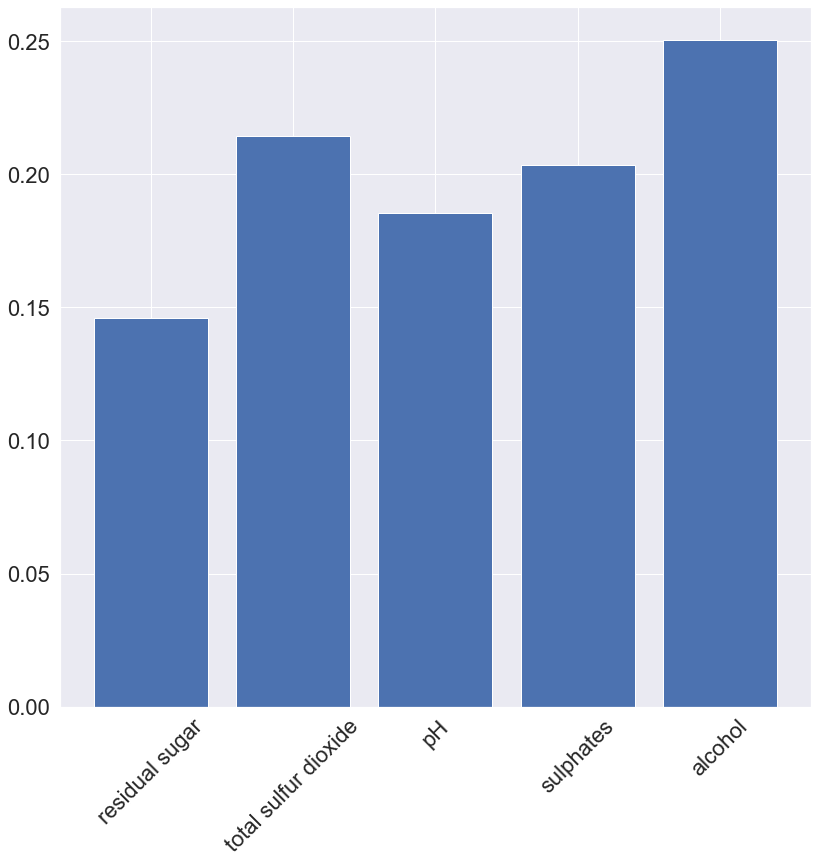

In [249]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
plt.figure(figsize=(12,12))
plt.bar(X_train.columns, clf.feature_importances_)
plt.xticks(rotation=45)

Таким образом, все наши переменные оказались сильно влияющими на оценку сомелье, и поэтому отказываться даже от части их нет смысла, и оценивать качество вина надо по всем этим параметрам.

# Выводы:
Решив задачу кластеризации, нам удалось выделить группы вин, для распределения их по классам в магазинах. Задача классификации позволяет предсказать оценку сомелье для новых сортов вина по его химическому составу.